In [24]:
from sympy import *
init_printing() #for pretty printing of symbolic maniputlation output in latex
# import sympy.galgebra.latex_ex as tex
import numpy as np

In [3]:
#Define some symbolic vectors and matrices

L__N,L__R,S,C = Symbol('L__N'), Symbol('L__R'), Symbol('S'), Symbol('C')
X = Matrix([[L__N], [S], [C], [L__R]])

sigma_1,sigma_2,sigma_3,sigma_4 = Symbol('sigma_1'), Symbol('sigma_2'), \
                            Symbol('sigma_3'), Symbol('sigma_4')
Sigma = Matrix(diag(sigma_1, sigma_2, sigma_3, sigma_4))

alpha__R,lamda, tau = Symbol('alpha__R'),Symbol('lamda'),Symbol('tau')

theta__Q, K__Q  =  MatrixSymbol('theta__Q',4,1), MatrixSymbol('K__Q',4,4) 
    
G__N, G__R = Symbol('G__N'), Symbol('G__R')   

In [4]:
B__N_1,B__N_2,B__N_3,B__N_4 = Symbol('B__N_1'), Symbol('B__N_2'), Symbol('B__N_3'), Symbol('B__N_4')
B__N = Matrix([[B__N_1], [B__N_2], [B__N_3], [B__N_4]])

B__R_1,B__R_2,B__R_3,B__R_4 = Symbol('B__R_1'), Symbol('B__R_2'), Symbol('B__R_3'), Symbol('B__R_4')
B__R = Matrix([[B__R_1], [B__R_2], [B__R_3], [B__R_4]])

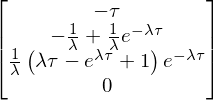

In [5]:
#Solve for BN
term = collect(expand(-1/tau * B__N.dot(X) - X.dot(Matrix([[1], [(1-exp(-lamda * tau))/(lamda*tau)], \
                                           [(1-exp(-lamda * tau))/(lamda*tau)-exp(-lamda *tau)], \
                                           [0]])))
      , [L__N, S, C, L__R])
eqns_list = [term.coeff(var)  for var in [L__N, S, C, L__R]]
B__N = Matrix([solve(eqns_list[i],B__N[i],simplify=True) for i in range(4) ])

B__N


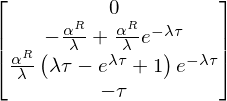

In [6]:
#Solve for BR
term = collect(expand(-1/tau * B__R.dot(X) - X.dot(Matrix([[0], [alpha__R*(1-exp(-lamda * tau))/(lamda*tau)], \
                                           [alpha__R*((1-exp(-lamda * tau))/(lamda*tau)-exp(-lamda *tau))], \
                                           [1]])))
      , [L__N, S, C, L__R])
eqns_list = [term.coeff(var)  for var in [L__N, S, C, L__R]]
B__R = Matrix([solve(eqns_list[i],B__R[i],simplify=True) for i in range(4) ])

B__R

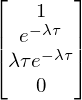

In [53]:
# dB__Ndt 
dB__Ndt = -Matrix([simplify(diff(B__N[i], tau)) for i in range(4)])
dB__Ndt

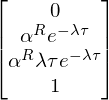

In [54]:
# dB__Rdt
dB__Rdt = -Matrix([simplify(diff(B__R[i], tau)) for i in range(4)])
dB__Rdt

In [50]:
#rho

rho__N_1, rho__R_1 = Matrix([[1], [1], [0], [0]]), Matrix([[0], [alpha__R], [0], [1]])
rho__N_0, rho__R_0 = Matrix([[0], [0], [0], [0]]), Matrix([[0], [0], [0], [0]])

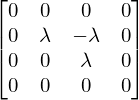

In [43]:
#K__Q
K__Q = Matrix([[0, 0 , 0, 0], [0, lamda,-lamda,0 ], [0,0,lamda,0], [0,0,0,0]])
K__Q

In [56]:
# check
simplify(rho__N_1 + K__Q.T * B__N) == dB__Ndt

True

In [55]:
# check
simplify(rho__R_1 + K__Q.T * B__R) == dB__Rdt

True

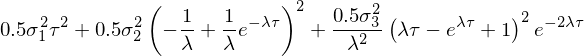

In [95]:
#Solving for G

rho__N_0, rho__R_0  = Matrix([0]) , Matrix([0]) 
theta__Q = Matrix([[0], [0], [0], [0]])

dG__Ndt = trace(rho__N_0 - B__N.T * K__Q * theta__Q )- (1/2.0) * trace(Sigma.T * B__N * B__N.T * Sigma)
dG__Ndtau = collect(- dG__Ndt,[sigma_1**2, sigma_2**2, sigma_3**2, sigma_4**2])
dG__Ndtau

In [96]:


dG__Rdt = trace(rho__R_0 - B__R.T * K__Q * theta__Q ) - (1/2.0) * trace(Sigma.T * B__R * B__R.T * Sigma)
dG__Rdtau = collect(- dG__Rdt,[sigma_1**2, sigma_2**2, sigma_3**2, sigma_4**2])
dG__Rdtau

                              2                                        2      
        2   2 ⎛       λ⋅τ    ⎞   -2⋅λ⋅τ           ⎛               -λ⋅τ⎞       
0.5⋅α__R ⋅σ₃ ⋅⎝λ⋅τ - ℯ    + 1⎠ ⋅ℯ               2 ⎜  α__R   α__R⋅ℯ    ⎟       
─────────────────────────────────────── + 0.5⋅σ₂ ⋅⎜- ──── + ──────────⎟  + 0.5
                    2                             ⎝   λ         λ     ⎠       
                   λ                                                          

       
       
   2  2
⋅σ₄ ⋅τ 
       
       

In [97]:
print(dG__Rdtau )

0.5*alpha__R**2*sigma_3**2*(lamda*tau - exp(lamda*tau) + 1)**2*exp(-2*lamda*tau)/lamda**2 + 0.5*sigma_2**2*(-alpha__R/lamda + alpha__R*exp(-lamda*tau)/lamda)**2 + 0.5*sigma_4**2*tau**2


In [98]:
pprint(dG__Rdtau )

                              2                                        2      
        2   2 ⎛       λ⋅τ    ⎞   -2⋅λ⋅τ           ⎛               -λ⋅τ⎞       
0.5⋅α__R ⋅σ₃ ⋅⎝λ⋅τ - ℯ    + 1⎠ ⋅ℯ               2 ⎜  α__R   α__R⋅ℯ    ⎟       
─────────────────────────────────────── + 0.5⋅σ₂ ⋅⎜- ──── + ──────────⎟  + 0.5
                    2                             ⎝   λ         λ     ⎠       
                   λ                                                          

       
       
   2  2
⋅σ₄ ⋅τ 
       
       
